## Analysis Mushroom Data

### Introduction

Mushrooms are a beloved delicacy among people, but beneath their glamorous appearance, they may harbor deadly dangers. China is one of the countries with the largest variety of mushrooms in the world. At the same time, mushroom poisoning is one of the most serious food safety issues in China. According to relevant reports, in 2021, China conducted research on 327 mushroom poisoning incidents, involving 923 patients and 20 deaths, with a total mortality rate of 2.17%. For non professionals, it is impossible to distinguish between poisonous mushrooms and edible mushrooms based on their appearance, shape, color, etc. There is no simple standard that can distinguish between poisonous mushrooms and edible mushrooms. To determine whether mushrooms are edible, it is necessary to collect mushrooms with different characteristic attributes and analyze whether they are toxic. In this competition, 22 characteristic attributes of mushrooms were analyzed to obtain a mushroom usability model, which can better predict whether mushrooms are edible.
[Mushroom Data](https://www.kaggle.com/datasets/sakurapuare/mushroom-classification-enhanced)

### Attribute Information
1. **classes (target)**: edible=e, poisonous=p.
2. **cap-shape**: bell=b, conical=c, convex=x,flat=f, knobbed=k, sunken=s
3. **cap-surface**: fibrous=f, grooves=g, scaly=y, smooth=s
4. **cap-color**: brown=n, buff=b,cinnamon=c, gray=g, green=r,pink=p ,purple=u, red=e, white=w, yellow=y
5. **ruises**: bruises=t, no=f
6. **odor**: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s
7. **gill-attachment**: attached=a, descending=d, free=f, notched=n
8. **gill-spacing**: close=c, crowded=w, distant=d
9. **gill-size**: broad=b, narrow=n
10. **gill-color**: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y
11. **stalk-shape**: enlarging=e, tapering=t
12. **stalk-root**: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?
13. **stalk-surface-above-ring**: fibrous=f, scaly=y, silky=k, smooth=s
14. **stalk-surface-below-ring**: fibrous=f, scaly=y, silky=k, smooth=s
15. **stalk-color-above-ring**: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
16. **stalk-color-below-ring**: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
17. **veil-type**: partial=p, universal=u
18. **veil-color**: brown=n, orange=o, white=w, yellow=y
19. **ring-number**: none=n, one=o, two=t
20. **ring-type**: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z
21. **spore-print-color**: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y
22. **population**: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y
23. **habitat**: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

### Importing Dataset

In [1]:
# Libraries to use
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Importing the dataset
mushroom_dataset = pd.read_csv('../assets/data/mushroom.csv')
mushroom_dataset.head()

,class,cap-shape,cap-surface,cap-color,ruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,x,f,n,f,n,f,w,n,b,...,y,w,p,NaN,n,o,p,w,v,NaN
1,p,NaN,y,g,t,NaN,f,c,b,k,...,s,n,c,p,w,n,e,NaN,y,g
2,e,b,y,n,t,n,f,c,NaN,n,...,s,p,NaN,p,w,o,p,b,y,w
3,e,x,g,g,t,n,f,w,b,n,...,s,p,NaN,p,w,n,n,NaN,NaN,d
4,e,NaN,f,NaN,t,n,a,w,n,n,...,k,NaN,w,p,w,NaN,l,w,v,d


### Initial Data Exploration

In [3]:
mushroom_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25986 entries, 0 to 25985
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     25986 non-null  object
 1   cap-shape                 22513 non-null  object
 2   cap-surface               22507 non-null  object
 3   cap-color                 22527 non-null  object
 4   ruises                    22514 non-null  object
 5   odor                      22536 non-null  object
 6   gill-attachment           22505 non-null  object
 7   gill-spacing              22587 non-null  object
 8   gill-size                 22494 non-null  object
 9   gill-color                22418 non-null  object
 10  stalk-shape               22512 non-null  object
 11  stalk-root                22458 non-null  object
 12  stalk-surface-above-ring  22478 non-null  object
 13  stalk-surface-below-ring  22563 non-null  object
 14  stalk-color-above-ring

In [4]:
mushroom_dataset.iloc[:,0:12].describe(include='all')

,class,cap-shape,cap-surface,cap-color,ruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root
count,25986,22513,22507,22527,22514,22536,22505,22587,22494,22418,22512,22458
unique,2,6,4,10,2,9,2,2,2,12,2,5
top,e,x,y,n,f,n,f,c,b,b,t,b
freq,14354,7674,7602,4810,12361,6986,17811,16092,13997,3679,12171,8123


In [5]:
mushroom_dataset.iloc[:,13:].describe(include='all')

,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,22563,22413,22553,22489,22483,22497,22478,22493,22475,22502
unique,4,9,9,1,4,3,5,9,6,7
top,s,w,w,p,w,o,p,w,v,d
freq,10619,8580,8403,22489,15742,15713,8501,5085,8409,6573


In [6]:
missing_values = mushroom_dataset.isnull().sum()
missing_values[missing_values > 0]

cap-shape                   3473
cap-surface                 3479
cap-color                   3459
ruises                      3472
odor                        3450
gill-attachment             3481
gill-spacing                3399
gill-size                   3492
gill-color                  3568
stalk-shape                 3474
stalk-root                  3528
stalk-surface-above-ring    3508
stalk-surface-below-ring    3423
stalk-color-above-ring      3573
stalk-color-below-ring      3433
veil-type                   3497
veil-color                  3503
ring-number                 3489
ring-type                   3508
spore-print-color           3493
population                  3511
habitat                     3484
dtype: int64

We can see there are null data in all columns of the dataset, we see graphics that help to understand the data.

### Data Visualization

#### Frequency Graphs

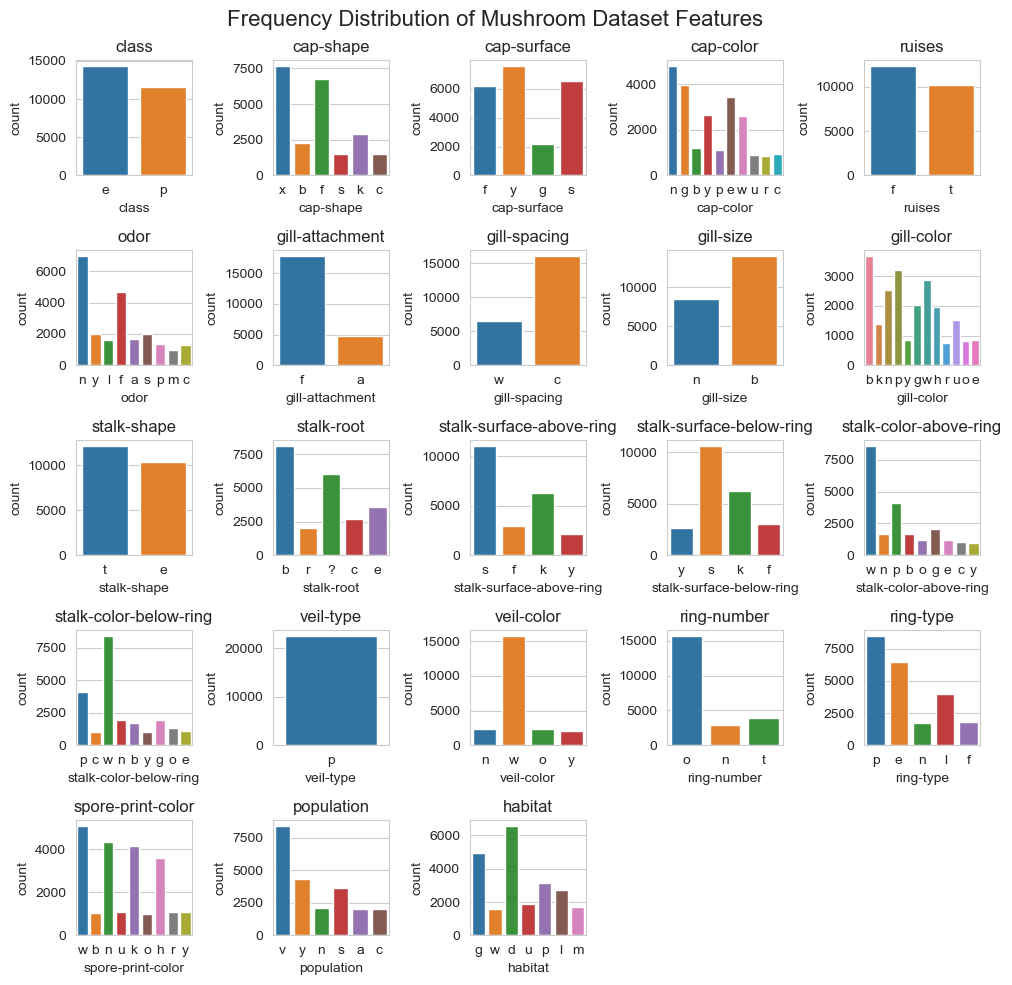

In [7]:
sns.set_style('whitegrid')

fig, axs = plt.subplots(5, 5, figsize=(10, 10))

num_cols = len(mushroom_dataset.columns)

axs = axs.flatten()

for i, col in enumerate(mushroom_dataset.columns):
    sns.countplot(x=col, data=mushroom_dataset, ax=axs[i], hue=col, legend=False)
    axs[i].set_title(f'{col}', fontsize=12)

for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

fig.suptitle('Frequency Distribution of Mushroom Dataset Features', fontsize=16)

plt.subplots_adjust(top=0.92)

plt.tight_layout()

plt.show()

Based on the frequency graphs, we can draw several important conclusions about the distribution of categories in each feature of the dataset. Here are some possible observations:

1. Class of Mushroom (class-target):
   
    There is a balanced distribution between poisonous (p) and edible (e) mushrooms, which is crucial for training a balanced model.

2. Cap Shape (cap-shape):
    
    Some cap shapes are more common than others. For example, the shape x seems to be the most frequent, while others like k and s are less common.

3. Cap Surface (cap-surface):
    
    The surfaces s and y are the most common, while f is less frequent.

4. Cap Color (cap-color):
    
    The color n (brown) is the most common, followed by g (gray) and e (red). Other colors like u and r are much less frequent.

5. Ruises (ruises):
   
    Most mushrooms have bruises (t), while a smaller proportion does not (f).

6. Odor (odor):
    
    There is a wide variation in odors, with n (none) being the most common. Other odors like f (fishy) and y (musty) are also relatively common, while odors like c (creosote) and p (pungent) are less common.

7. Gill Attachment (gill-attachment):
    
    Most mushrooms have attached gills (f), and a smaller proportion have free gills (a).

8. Gill Spacing (gill-spacing):
   
    The spacing c is much more common than w.

9. Gill Size (gill-size):
    
    The size b (broad) is more frequent than n (narrow).

10. Gill Color (gill-color):
    
    There is a diversity of gill colors, with p (pink) being the most common.

11. Stalk Shape (stalk-shape):
    
    The shapes t and e are relatively evenly distributed.

12. Stalk Root (stalk-root):
    
    The category ? indicates many missing values. Roots b, e, and c are also present in significant proportions.

13. Stalk Surface Above Ring (stalk-surface-above-ring):
    
    The surface s is the most common above the ring.

14. Stalk Surface Below Ring (stalk-surface-below-ring):
    
    The surface s is also the most common below the ring.

15. Stalk Color Above Ring (stalk-color-above-ring):
    
    The color w is the most frequent above the ring.

16. Stalk Color Below Ring (stalk-color-below-ring):
    
    The color w is also the most common below the ring.

17. Veil Type (veil-type):
    
    All mushrooms have the same veil type (p), suggesting this feature may not be useful for classification.

18. Veil Color (veil-color):
    
    The colors w and o are the most common.

19. Ring Number (ring-number):
    
    Most mushrooms have one ring (o), with some having no rings (n) and others having two rings (t).

20. Ring Type (ring-type):

    The ring types p and e are the most common.

21. Spore Print Color (spore-print-color):

    The spore print colors k and n are the most common.

22. Population (population):

    The populations v (several) and y (solitary) are the most common.

23. Habitat (habitat):

    The habitats d (woods) and g (grasses) are the most common

#### Visualization Missing Data

<Axes: >

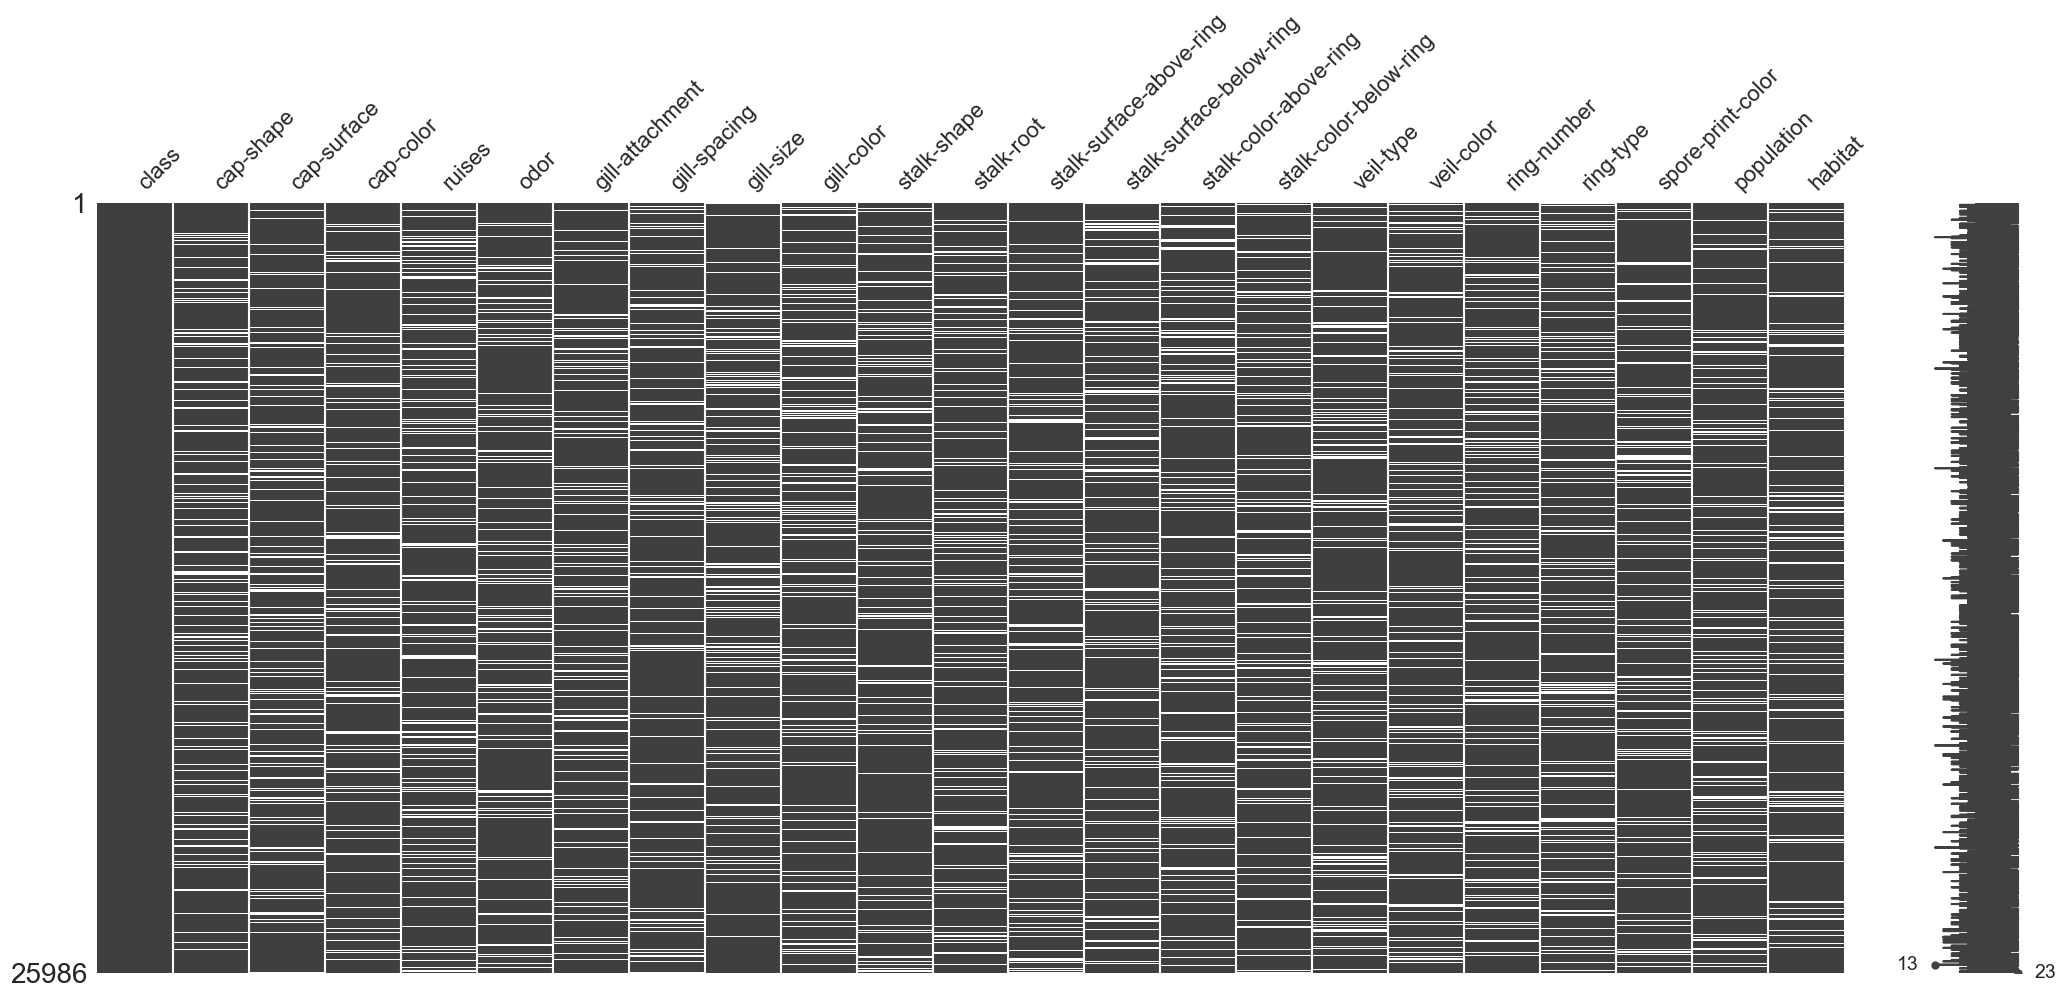

In [8]:
import missingno as msno
msno.matrix(mushroom_dataset)

<Axes: >

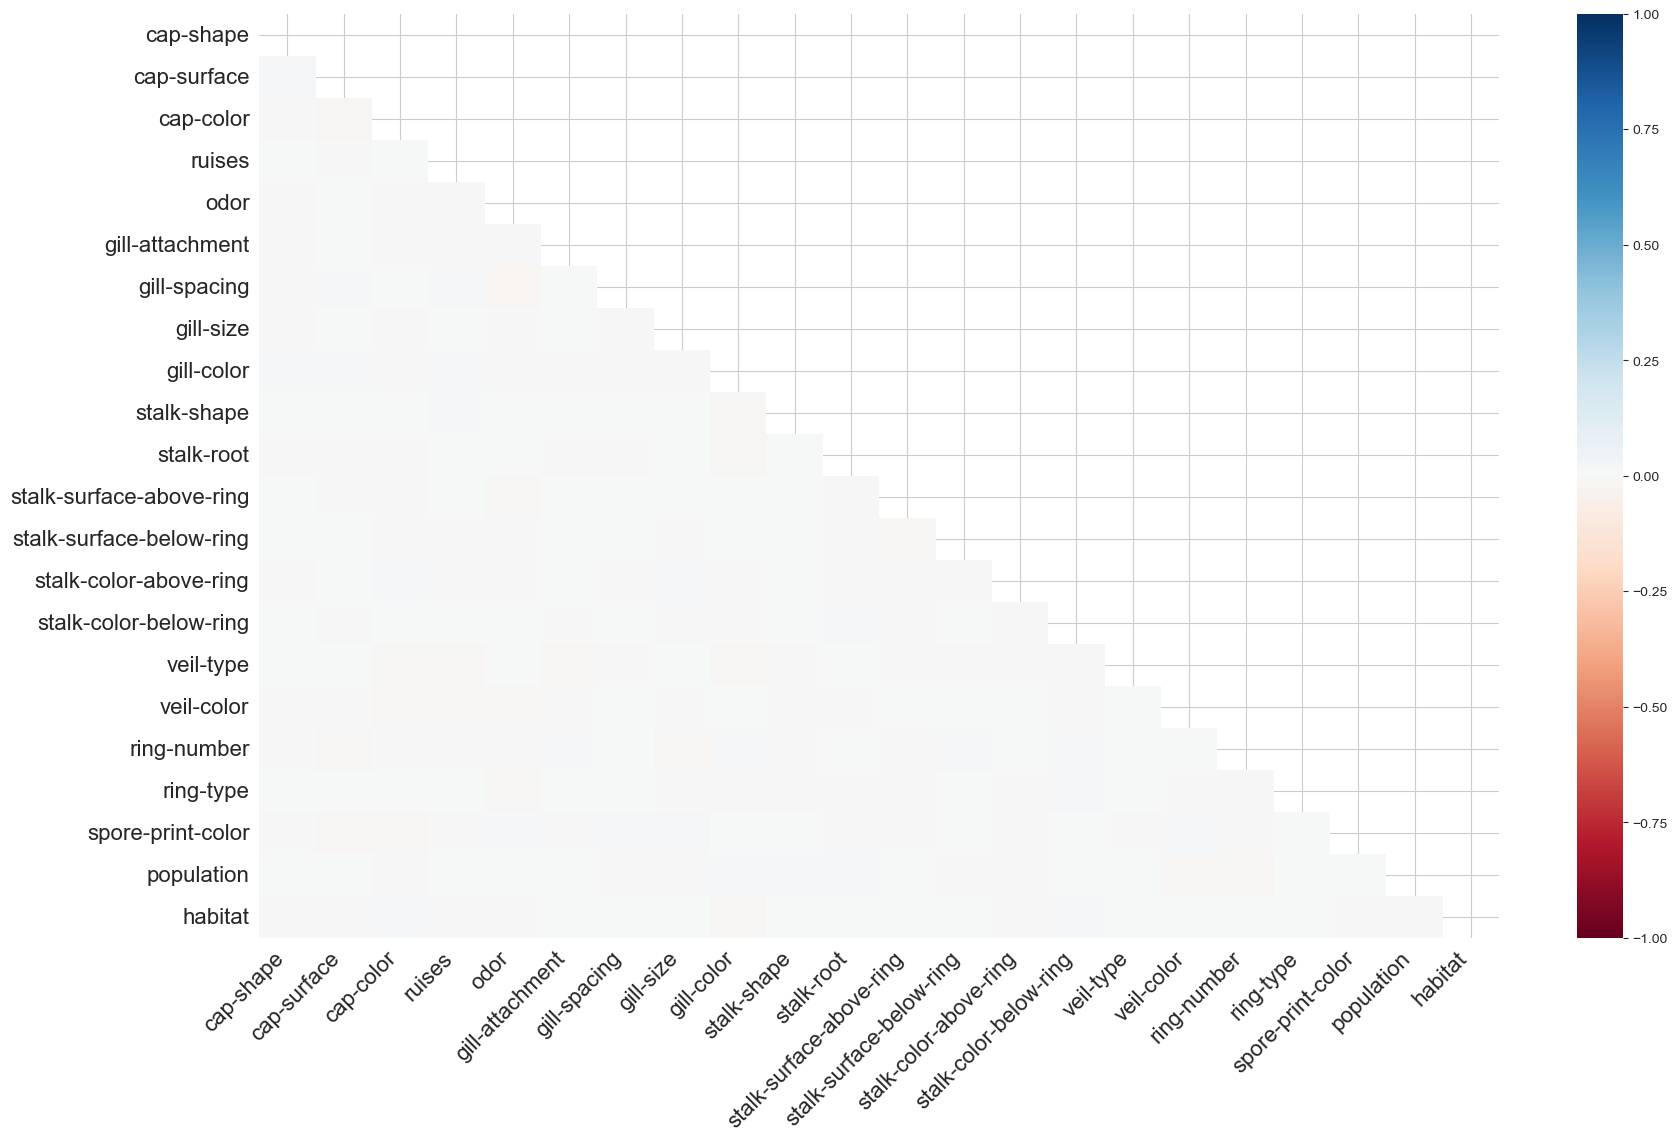

In [9]:
msno.heatmap(mushroom_dataset)

Based on the plots, we can conclude that although there are NaN data, they do not have a pattern or correlation between the columns of the data set, therefore, we will do a mode imputation to replace these data.

This imputation takes the most frequent data in the column and replaces the NaN with these values.

In [10]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

mushroom_dataset_imputer = mushroom_dataset.copy()
mushroom_dataset_imputer = pd.DataFrame(imputer.fit_transform(mushroom_dataset_imputer), columns=mushroom_dataset.columns)
mushroom_dataset_imputer.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
ruises                      0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

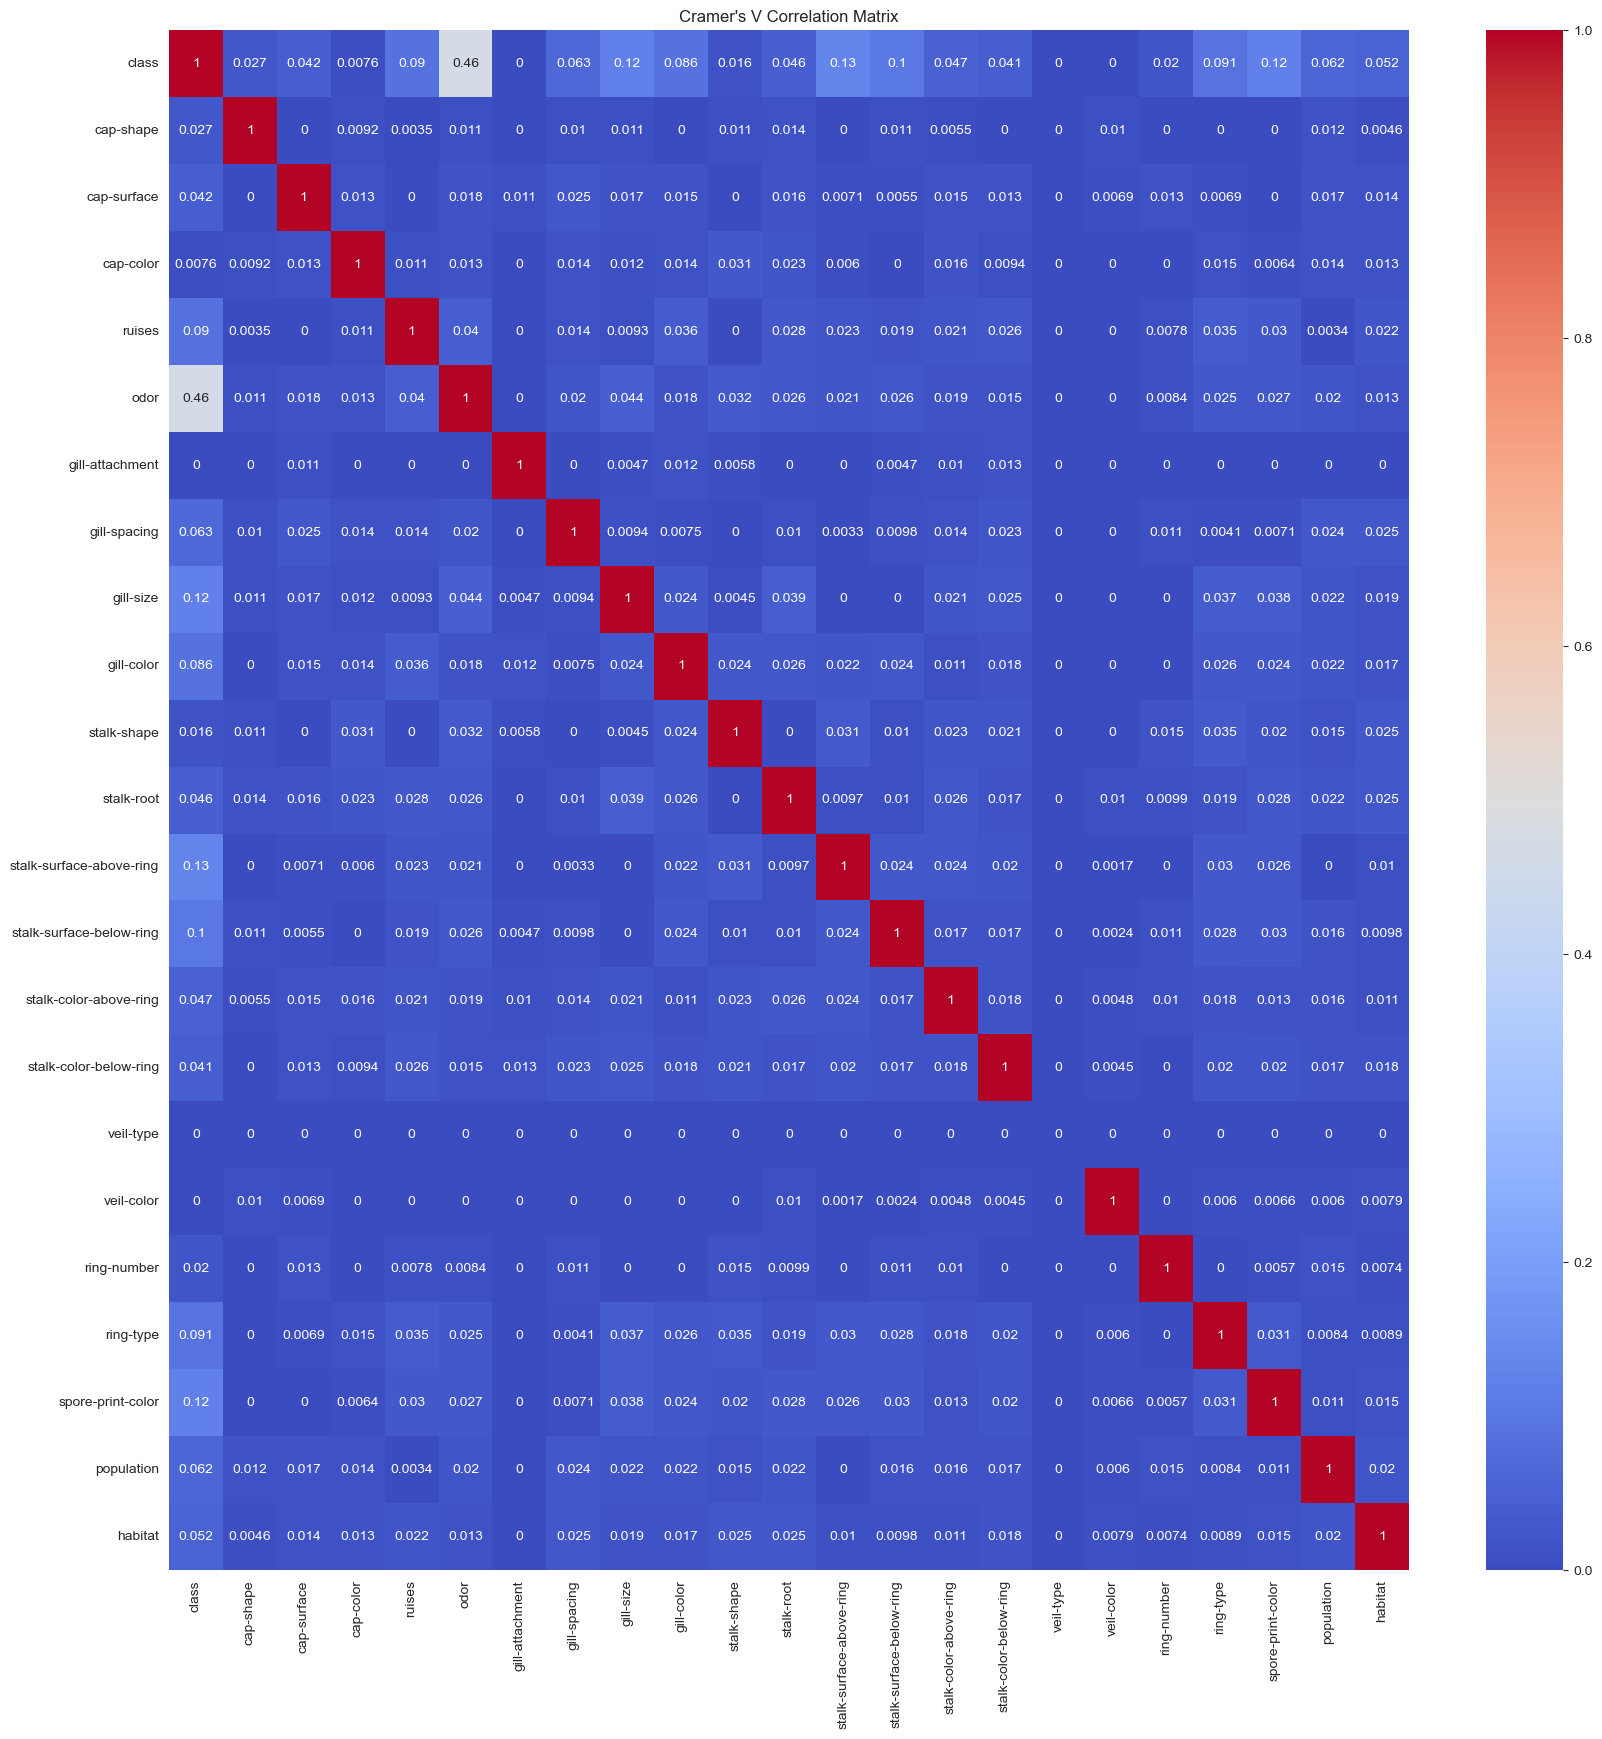

In [11]:
import scipy.stats as stats

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)

    if (rcorr-1) > 0 and (kcorr-1) > 0:
        return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
    else:
        return 0.0

corr_matrix = pd.DataFrame(index=mushroom_dataset_imputer.columns, columns=mushroom_dataset_imputer.columns)
for col1 in mushroom_dataset_imputer.columns:
    for col2 in mushroom_dataset_imputer.columns:
        corr_matrix.loc[col1, col2] = cramers_v(mushroom_dataset_imputer[col1], mushroom_dataset_imputer[col2])

plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix.astype(float), annot=True, cmap='coolwarm')
plt.title('Cramer\'s V Correlation Matrix')
plt.show()


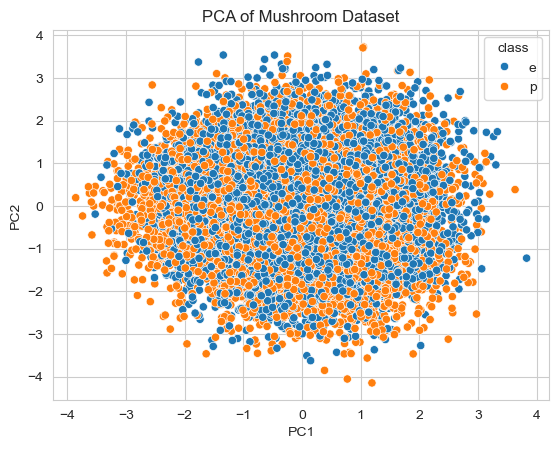

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Supongamos que `mushroom_dataset` es el DataFrame con todas las columnas

# Separar las características de la variable objetivo
X = mushroom_dataset.drop('class', axis=1)  # Variables independientes
y = mushroom_dataset['class']  # Variable objetivo

# Convertir datos categóricos a datos numéricos
X_encoded = X.apply(LabelEncoder().fit_transform)

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Aplicar PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Crear un DataFrame con los componentes principales
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['class'] = y  # Añadir la variable objetivo para la visualización

# Visualizar los resultados
sns.scatterplot(x='PC1', y='PC2', hue='class', data=pca_df)
plt.title('PCA of Mushroom Dataset')
plt.show()